## Simulation: Drop needles

Suppose we have a floor made of parallel strips of wood, each the same width $t$, and we drop a needle with length $l=t$ onto the floor. What is the probability that the needle will lie across a line between two strips?

Below is an example of two needles dropped. Needle a falls across a line, while needle b does not.

![Example](needle.png)

In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm as n

![needleExmple2](needleExmple2.png)

In [32]:

def drop_needle(strip_length, needle_length):
    #store pi
    pi=np.pi
    #total x-length
    totalx=2*strip_length
    #generate random x value
    x=np.random.uniform(totalx)
    #generate random angle
    angle=np.random.random()*2*pi
    #calculate the positon of the x-value of both sides of the needle
    x2=((needle_length/2)*np.cos(angle)) + x
    x1=x-((needle_length/2)*np.cos(angle))
    
    if (x2>=x1) and (( (x1<=strip_length) and (x2>=strip_length)) or x1<=0 or x2>=totalx) :
        return 1
    elif (x2<x1) and (((x2<=strip_length) and (x1>=strip_length)) or x2<=0 or x1>=totalx):
        return 1
    else :
        return 0
            
#We can use the uniform distribution from (0, 2t) because we can say the needles that have x values less than 0 or x values greater than 2t fall on the boundary between two pieces of wood.
#This is because if a needle has a center of mass before the boundary and an x value ater the boundary, the needle therfore landed on the boundary. 


In [37]:
def run_simulation(n, strip_length, needle_length):
    count = 0
    for x in range(n):
        count = count + drop_needle(strip_length, needle_length)
    return count/n
print(run_simulation(100000, 1, 1))

0.63607


### Running the simulation


In [38]:
count = [0]*500
for x in range(500):
    count[x]=run_simulation(1000, 1, 1)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

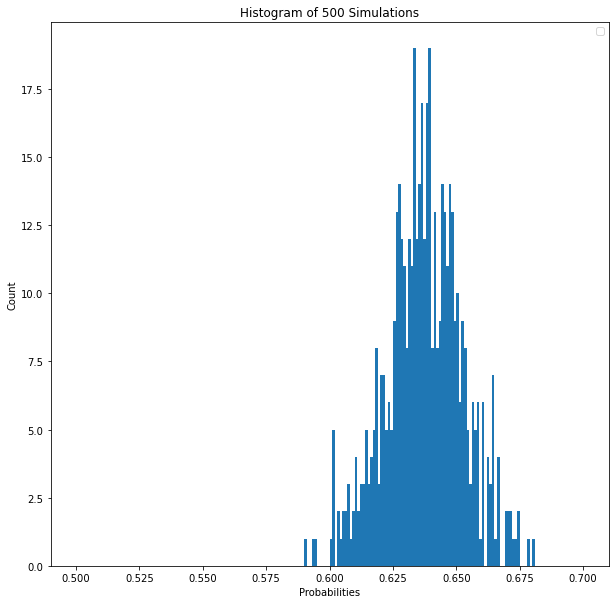

In [39]:
plt.figure(figsize=(10,10))
common_params = dict(bins=200, 
                     range=(.5, .7))


plt.title('Histogram of 500 Simulations')
plt.hist(count, **common_params)
plt.legend()
plt.xlabel("Probabilities")
plt.ylabel("Count")
plt.show

## Estimate $\pi$ based on the returned probability

$ Pr(S_n)=\frac{S_n}{n} \\
\textrm{If we know } S_n \textrm{ is 3154 and n is 5000 we can prove } Pr(S_n)= \frac{2}{pi} \textrm{ from the equation above.} \\
Pr(S_n)=\frac{3154}{5000}=.6308 \\
\frac{2}{\pi}=.6366 \\
\textrm{Thus, given some error: } \\
Pr(S_n)=\frac{2}{\pi} $



WLLN using Chebyshev's Inequality:

$ \mathrm{Pr}(|\frac{S_n}{n}-\mu| \ge \epsilon) \le \frac{ Var(\frac{S_n}{n}) }{ \epsilon^2 }=\frac{\sigma^2}{n \epsilon^2} \\ 
\epsilon=0.1 \\
\sigma^2=Var(X_i)=E(X_i^2)-[E(X_i)]^2 \\
E(X_i^2)=(1^2)(\frac{2}{\pi})=\frac{2}{\pi} \\
[E(X_i)]^2=[(1)(\frac{2}{\pi})]^2=\frac{4}{\pi^2} \\
Var(X_i)=\frac{2}{\pi}-\frac{4}{\pi^2}=.231335... \\
\\
.05=\frac{\sigma^2}{n \epsilon^2} \\
.05=\frac{.231335}{n (.1)^2}\\
n=462.67... $

Thus, you should drop at least 463 needles to reach a confidence of 95% and have $\epsilon=0.1.$


What does the CLT say about $S_n$?

In [73]:
pr=run_simulation(n=5000, strip_length=1, needle_length=1)
mean=5000*pr
print(pr)
print(mean)

0.6308
3154.0


$mean= 3154.0 \\
\textrm{From our calculations above we know, } E(X_i^2) = E(X_i) \textrm{, so } E(X_i^2) = 0.6308. \\
Var(X_i) = E(X_i^2)-[E(X_i)]^2 = 0.6308-(0.6308)^2 = 0.23289136\\
\sigma^2 = Var(S_n) = \sum_{i=1}^n Var(X_i) = \sum_{i=1}^n 0.23289136 = 1164.4568\\
\sigma = \sqrt{1164.4568} = 34.12414 \\
E(S_n)=3154.0 $


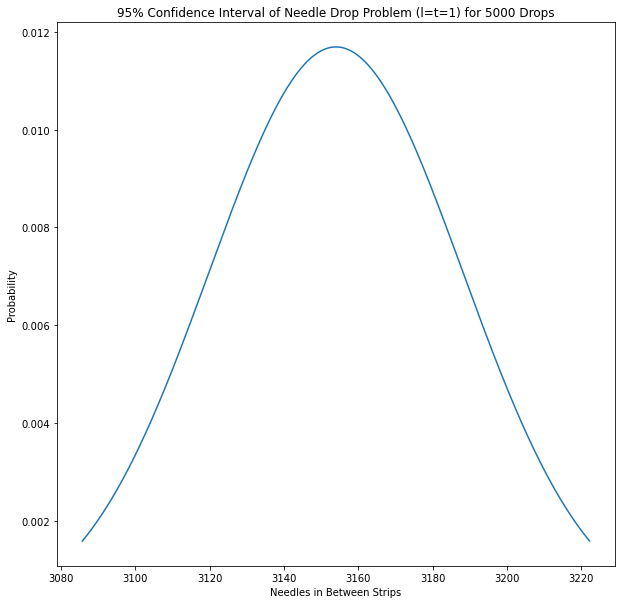

In [76]:
sd=34.12414
#95% confidence lies between 2 standard deviations from the mean
x1=mean -2*(sd)
x2=mean + 2*(sd)
x_axis = np.arange(x1, x2, 0.01)

plt.figure(figsize=(10,10))
plt.plot(x_axis, n.pdf(x_axis, mean, sd))
plt.title("95% Confidence Interval of Needle Drop Problem (l=t=1) for 5000 Drops")
plt.xlabel("Needles in Between Strips")
plt.ylabel("Probability")
plt.show()